In [1]:
import pandas as pd
import numpy as np
import os
from importlib import reload
import matplotlib.pyplot as plt
import seaborn as sns
import consts
import utils
import json
import regional_conservation_diversity as rcd
from statannotations.Annotator import Annotator
reload(consts)
reload(rcd)
reload(utils)
PATH = os.path.dirname(os.getcwd())

# Set the plotting style
plt.style.use('seaborn-v0_8-whitegrid')

NEG_STRAND = ['SHLP1', 'SHLP2', 'SHLP3', 'SHLP4', 'SHLP5'] # Negative strand MDPs

df = pd.read_csv(os.path.join(PATH, 'data', 'hs_pop_df_with_overlap_sequences_per_gene.csv')) # Read the main database file

# Add all the nested genes as columns to the dataframe
# Read the overlap data from data/overlap_dict.json
with open(os.path.join(PATH, 'data', 'overlap_coords.json'), 'r') as f:
    overlap_dict = json.load(f)
# Open the relative overlaps data from data/overlap_coords_rel.json
with open(os.path.join(PATH, 'data', 'overlap_coords_rel.json'), 'r') as f:
    relative_overlaps_dict = json.load(f)
# Flip all the nested lists from [start, end, gene_name] to [gene_name, start, end]
for parent_gene, nested_list in overlap_dict.items():
    for i in range(len(nested_list)):
        start, end, gene_name = nested_list[i]
REF_ID = 'NC_0129201'
# Print the number of sequences in df
print(f"Number of sequences in dataframe: {len(df)}")
df['organism'] = 'Homo sapiens'

c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\bin\utils.py:431: SyntaxWarning: invalid escape sequence '\('
  return re.sub(pattern='\(\w{3}\)',repl = '',string = gene)
c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\bin\utils.py:440: SyntaxWarning: invalid escape sequence '\D'
  loc = [0 if not checkInt(j) else int(re.sub(string = j, pattern = '\D+', repl = '')) for j in loc]


Number of sequences in dataframe: 66328


C:\Users\shtolz\AppData\Local\Temp\ipykernel_52972\2272343140.py:22: DtypeWarning: Columns (1,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(PATH, 'data', 'hs_pop_df_with_overlap_sequences_per_gene.csv')) # Read the main database file


Calculating per-position conservation for RNR2...
Plotting conservation...
Comparing conservation distributions...
Creating conservation split-view comparison...
Analysis complete!


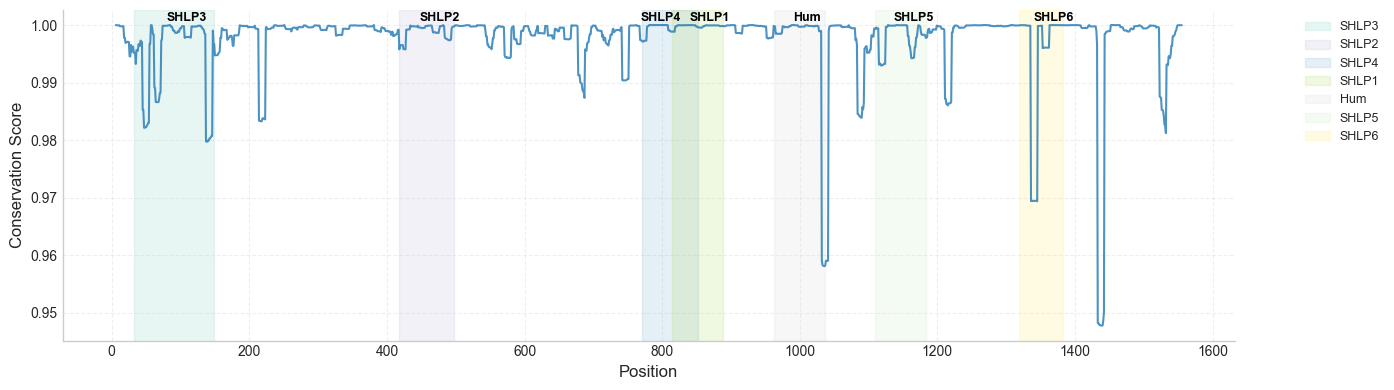

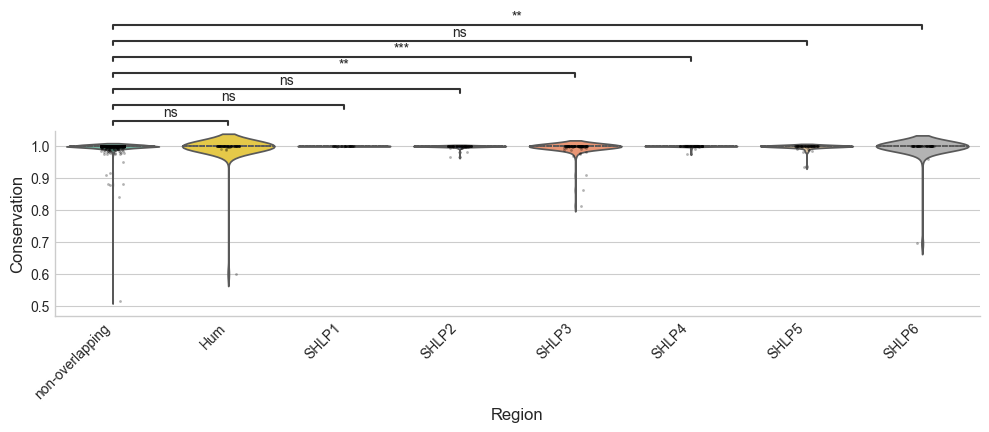

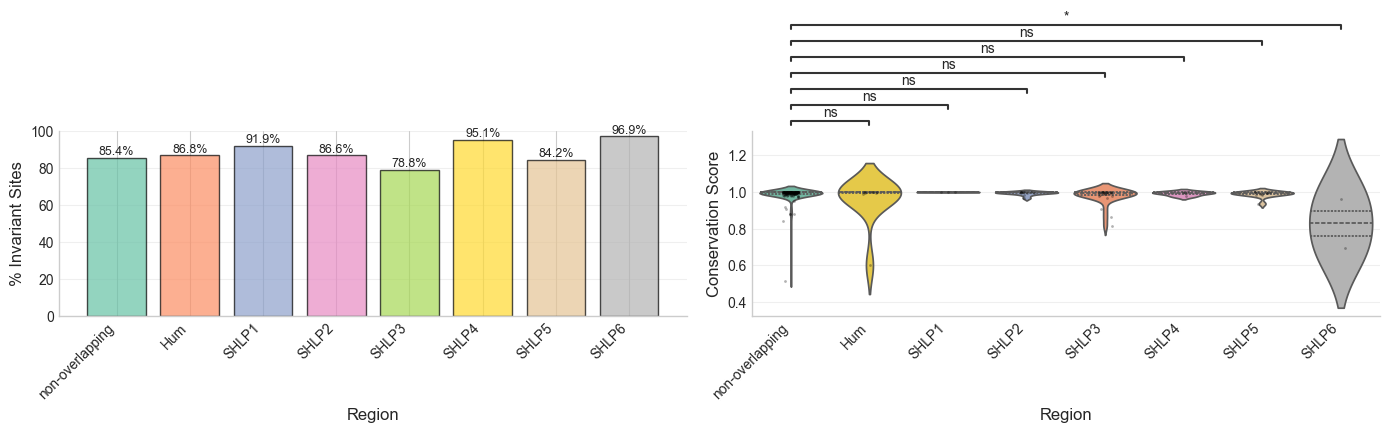

In [2]:
reload(rcd)

rnr2_cons_profile = rcd.analyze_gene_regions(
    df = df,
    gene_col = 'RNR2',
    overlapping_regions=relative_overlaps_dict['rnr2_overlaps_rel'],
    calculate_conservation= True,
    calculate_diversity= False,
    calculate_kl_divergence = False,
    calculate_composition= False,
    run_autocorrelation=False,
    autocorr_by_region_name= False,
    plot_density_comparison= False,
    plot_split_view= True,
    plot_results= True,
    window_size = 10,
    compare_distributions= True,
    output_dir=os.path.join(PATH, 'figures', 'conservation_analysis_rnr2'),
    show_title = False
    )

Calculating per-position conservation for RNR1...
Plotting conservation...
Comparing conservation distributions...
Creating conservation split-view comparison...
Analysis complete!


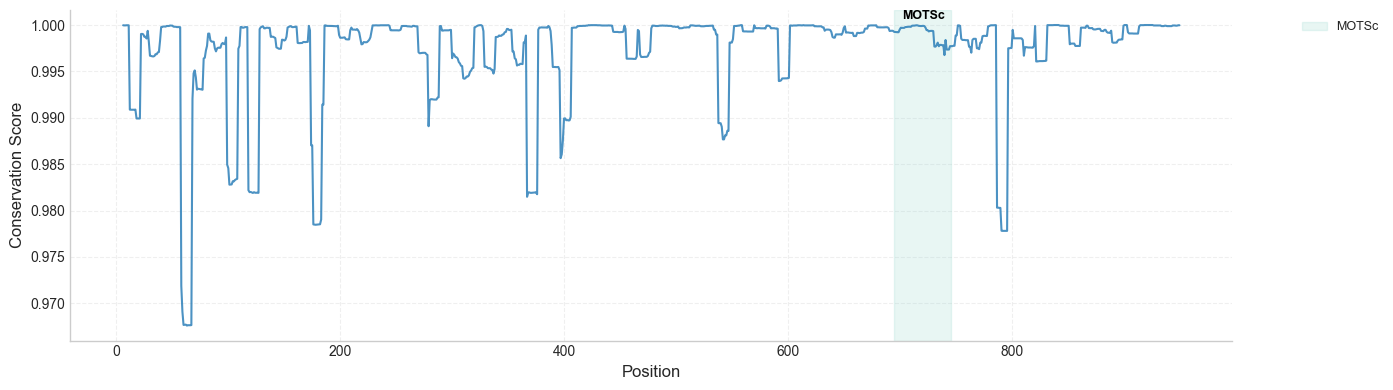

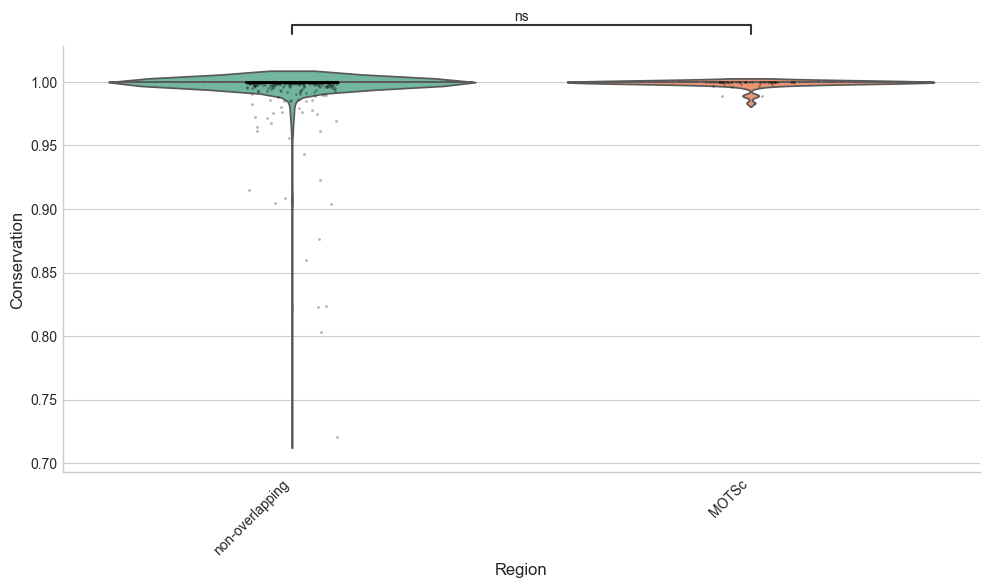

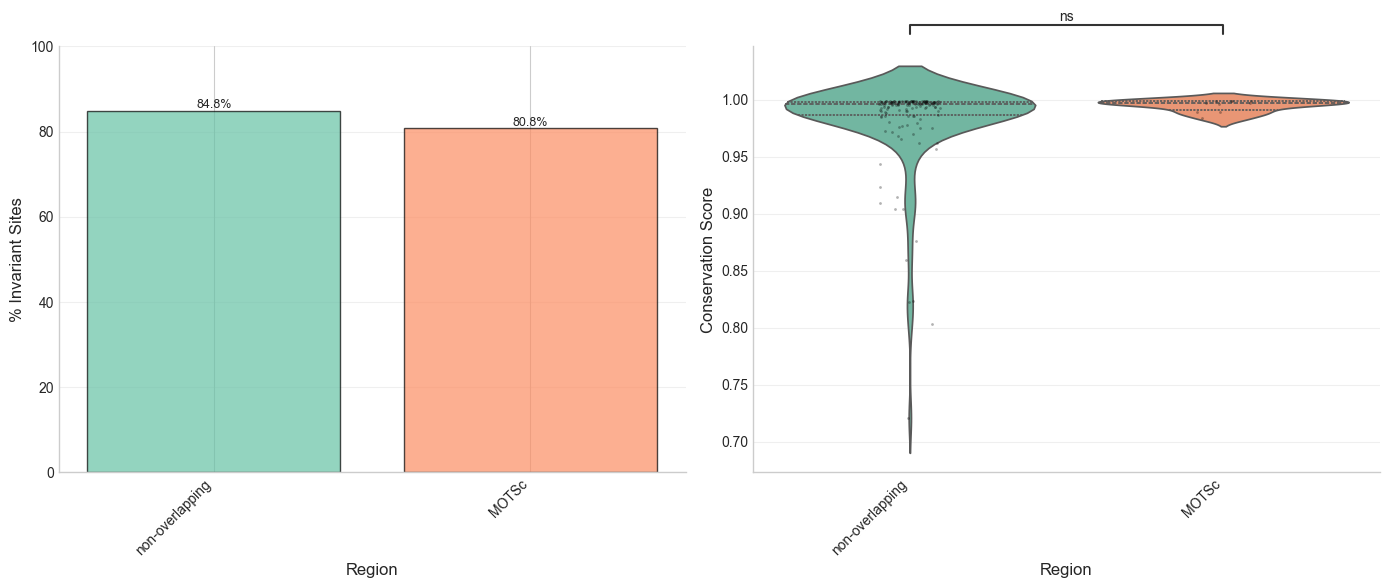

In [3]:
reload(rcd)

rnr1_cons_profile = rcd.analyze_gene_regions(
    df = df,
    gene_col = 'RNR1',
    overlapping_regions=relative_overlaps_dict['rnr1_overlaps_rel'],
    calculate_conservation= True,
    calculate_diversity= False,
    calculate_kl_divergence = False,
    calculate_composition= False,
    run_autocorrelation=False,
    plot_density_comparison= False,
    plot_split_view= True,
    plot_results= True,
    window_size = 10,
    compare_distributions= True,
    output_dir=os.path.join(PATH, 'figures', 'conservation_analysis_rnr1'),
    show_title = False
)

In [4]:
#Merge the nested lists of co1_overlaps_rel with gau_overlaps_rel
relative_overlaps_dict['co1_gau_overlaps_rel'] = relative_overlaps_dict['co1_overlaps_rel'] + relative_overlaps_dict['gau_overlaps_rel']

Calculating per-position conservation for COX1...
Plotting conservation...
Comparing conservation distributions...
Creating conservation split-view comparison...
Analysis complete!


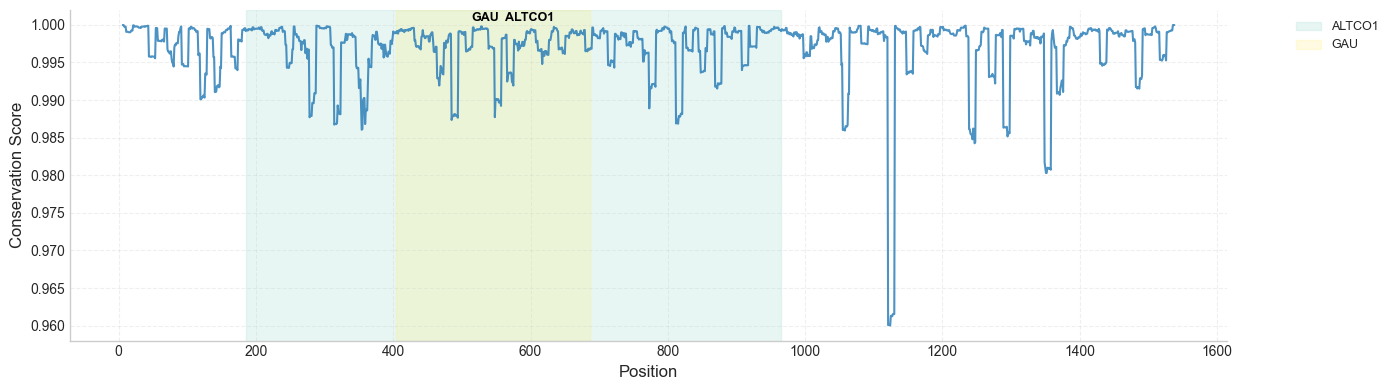

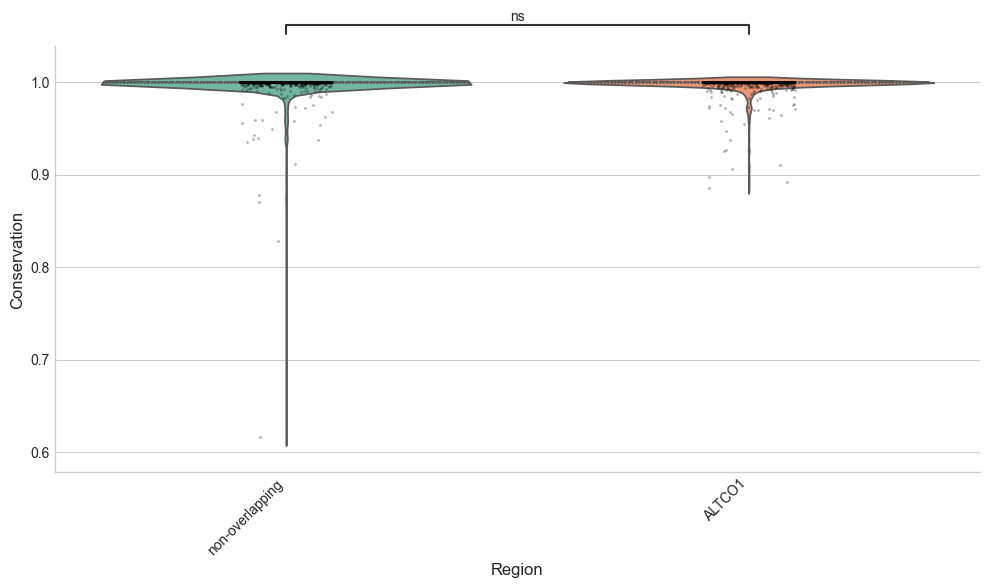

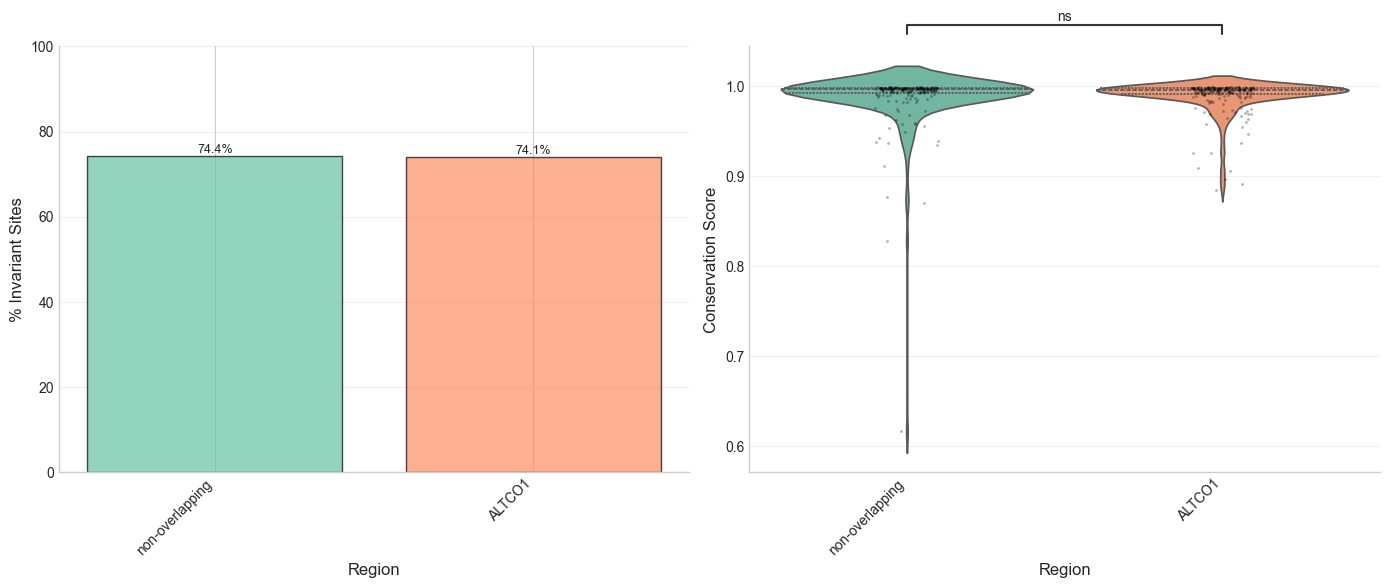

In [5]:
reload(rcd)

cox1_cons_profile = rcd.analyze_gene_regions(
    df = df,
    gene_col = 'COX1',
    overlapping_regions=relative_overlaps_dict['co1_gau_overlaps_rel'],
    calculate_conservation= True,
    calculate_diversity= False,
    calculate_kl_divergence= False,
    calculate_composition= False,
    run_autocorrelation=False,
    plot_density_comparison= False,
    plot_split_view= True,
    show_title = False,
    window_size = 10,
    plot_results= True,
    compare_distributions= True,
    output_dir=os.path.join(PATH, 'figures', 'conservation_analysis_cox1')
)

Calculating per-position conservation for ND4...
Plotting conservation...
Comparing conservation distributions...
Creating conservation split-view comparison...
Analysis complete!


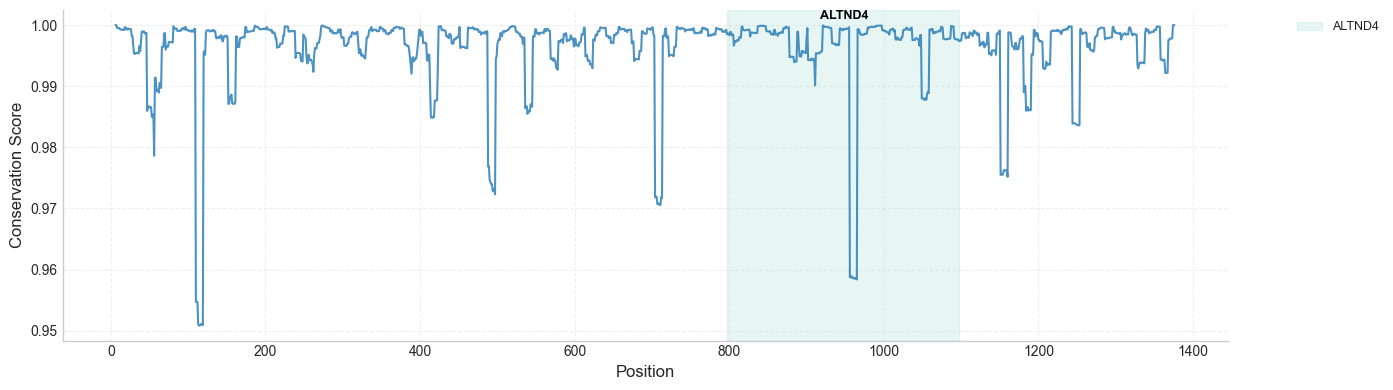

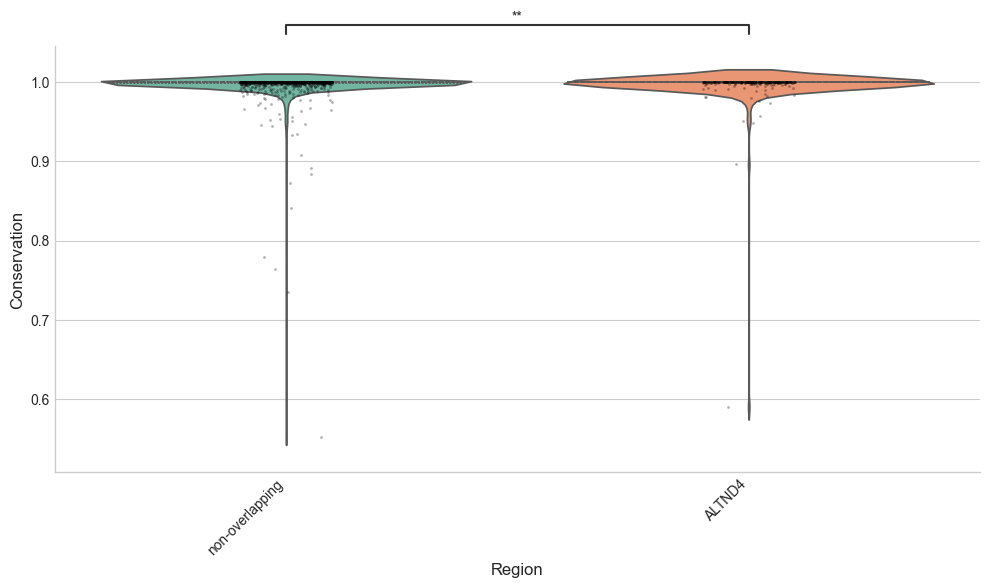

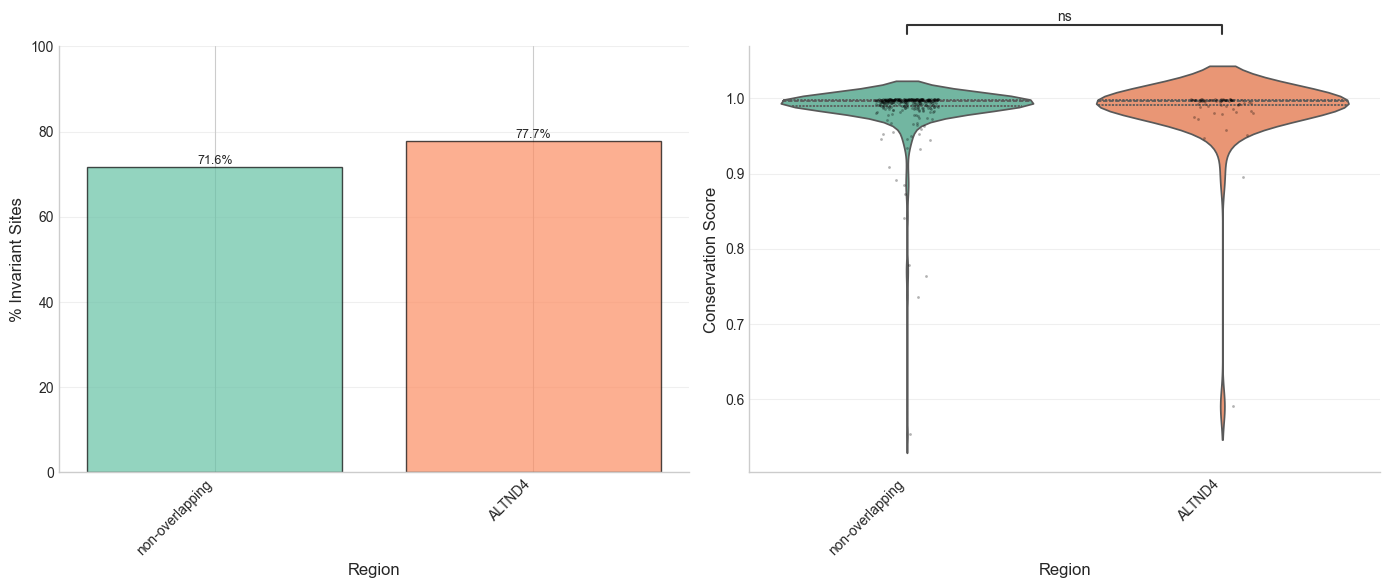

In [6]:
nd4_cons_profile = rcd.analyze_gene_regions(
    df = df,
    gene_col = 'ND4',
    overlapping_regions=relative_overlaps_dict['nad4_overlaps_rel'],
    calculate_conservation= True,
    calculate_diversity= False,
    calculate_kl_divergence = False,
    calculate_composition= False,
    run_autocorrelation=False,
    plot_density_comparison= False,
    plot_split_view= True,
    plot_results= True,
    window_size = 10,
    compare_distributions= True,
    output_dir=os.path.join(PATH, 'figures', 'conservation_analysis_nd4'),
    show_title = False
    )

Calculating per-position conservation for CYTB...
Plotting conservation...
Comparing conservation distributions...
Creating conservation split-view comparison...
Analysis complete!


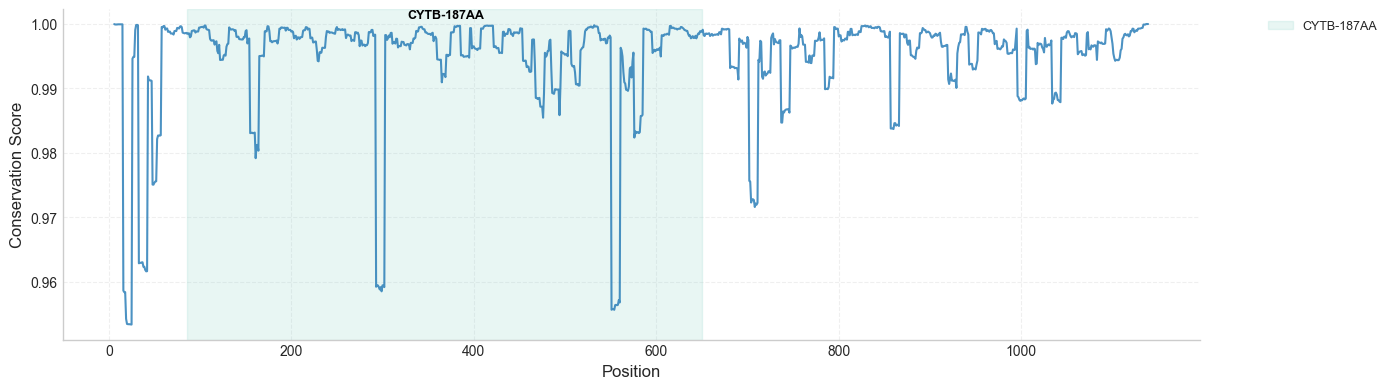

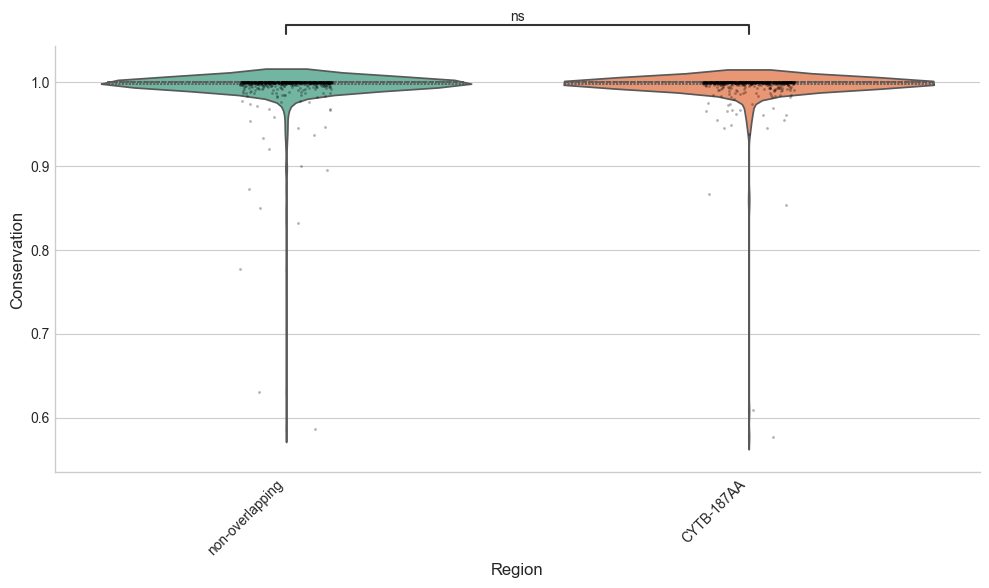

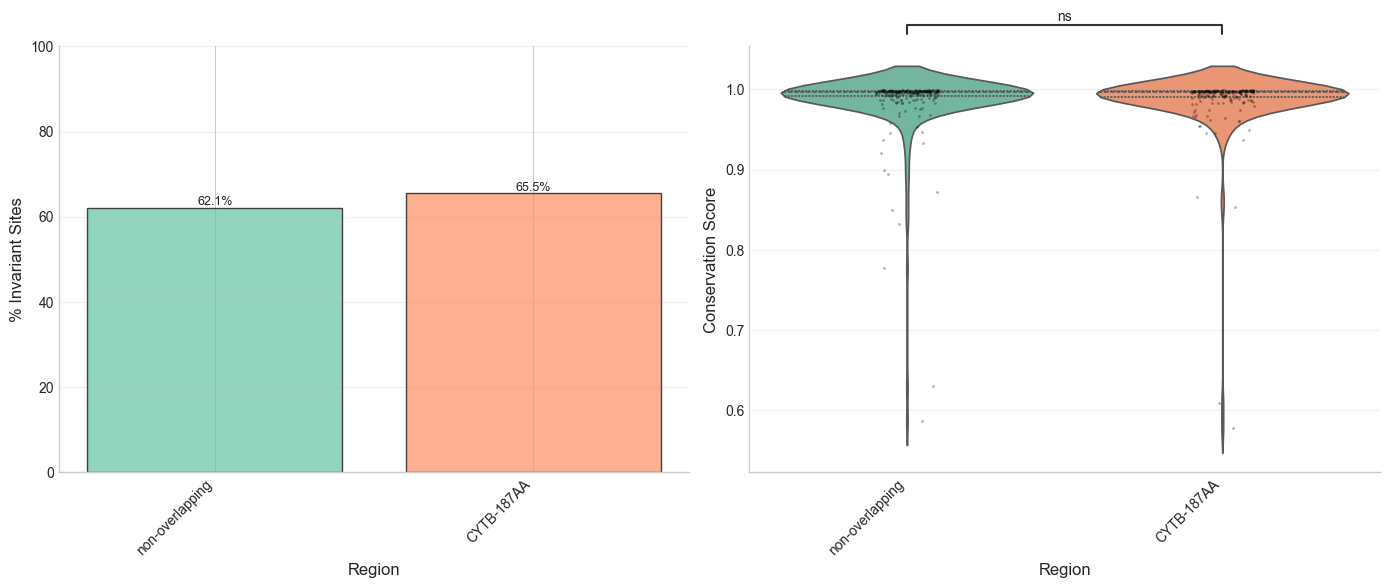

In [7]:
cyb_cons_profile = rcd.analyze_gene_regions(
    df = df,
    gene_col = 'CYTB',
    overlapping_regions=relative_overlaps_dict['cyb_overlaps_rel'],
    calculate_conservation= True,
    calculate_diversity= False,
    calculate_kl_divergence = False,
    calculate_composition= False,
    run_autocorrelation=False,
    plot_density_comparison= False,
    plot_split_view= True,
    plot_results= True,
    window_size = 10,
    compare_distributions= True,
    output_dir=os.path.join(PATH, 'figures', 'conservation_analysis_cyb'),
    show_title = False
    )

Calculating per-position conservation for TS2_TL2_ND5...
Plotting conservation...
Comparing conservation distributions...
Creating conservation split-view comparison...
Analysis complete!


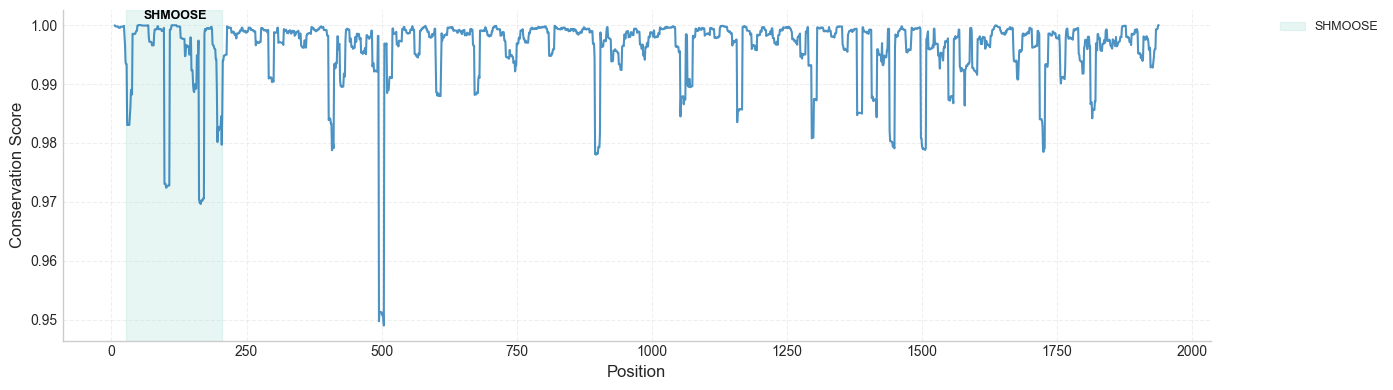

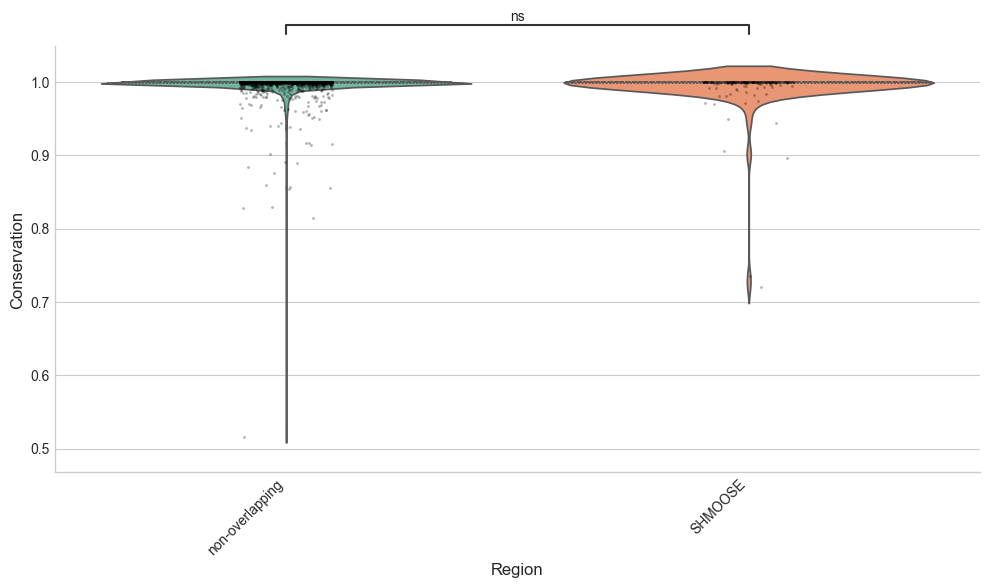

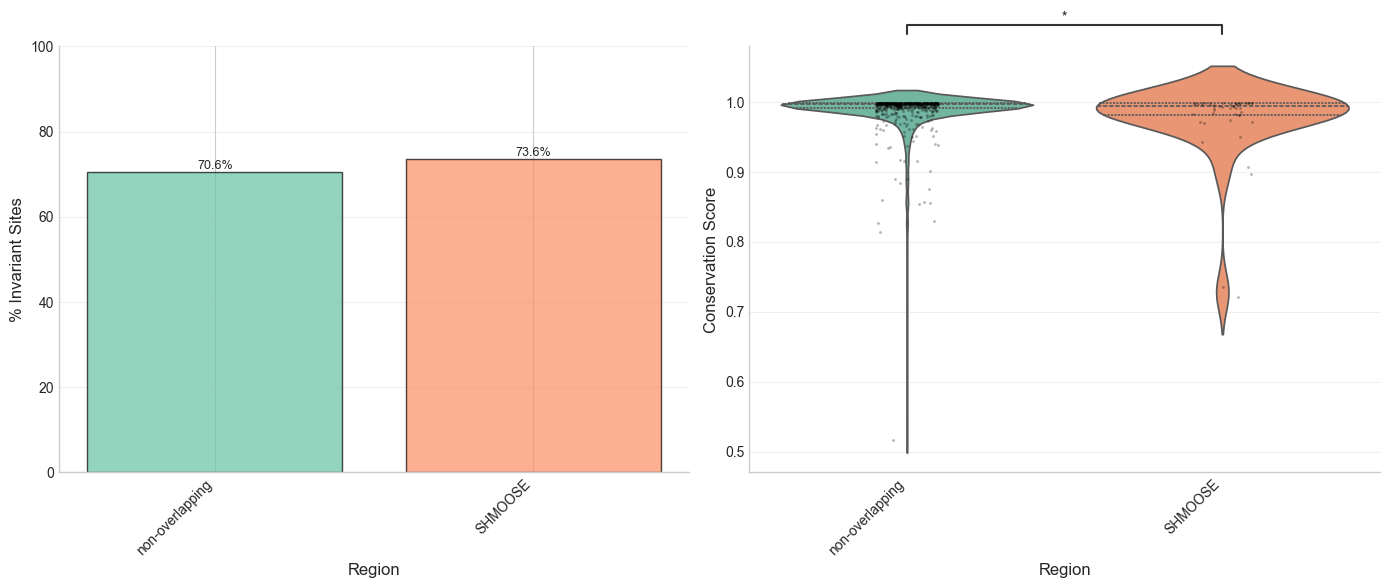

In [8]:
shmoose_cons_profile = rcd.analyze_gene_regions(
    df = df,
    gene_col = 'TS2_TL2_ND5',
    overlapping_regions=relative_overlaps_dict['shmoose_overlaps_rel'],
    calculate_conservation= True,
    calculate_diversity= False,
    calculate_kl_divergence = False,
    calculate_composition= False,
    run_autocorrelation=False,
    plot_density_comparison= False,
    plot_split_view= True,
    plot_results= True,
    window_size = 10,
    compare_distributions= True,
    output_dir=os.path.join(PATH, 'figures', 'conservation_analysis_shmoose'),
    show_title = False
    )

In [9]:
rename_regions = {'ALTND4' : 'MTALT-ND4', 'ALTCO1' : 'MTALT-CO1'}


,gene,region,non_overlap_pct,overlap_pct,pct_difference,ci_lower,ci_upper,ci_diff_lower,ci_diff_upper,n_overlap,n_non_overlap,test_used,statistic,pvalue_raw,pvalue_corrected,significant
0,RNR2,Hum,85.351562,86.842105,1.490543,77.445881,92.693118,-8.123220,7.776583,76,1024,Chi-squared,0.034970,0.851659,0.960473,False
1,RNR2,SHLP1,85.351562,91.891892,6.540329,78.699321,97.203943,-6.808054,12.328060,37,1024,Chi-squared,0.764524,0.381916,0.763833,False
2,RNR2,SHLP2,85.351562,86.585366,1.233803,77.554987,92.341309,-8.022715,7.431449,82,1024,Chi-squared,0.020197,0.886989,0.960473,False
3,RNR2,SHLP3,85.351562,78.813559,-6.538003,70.592755,85.217477,-15.006593,0.265679,118,1024,Chi-squared,2.999916,0.083269,0.249807,False
4,RNR2,SHLP4,85.351562,95.121951,9.770389,88.118538,98.086893,2.477708,13.521498,82,1024,Chi-squared,5.259204,0.021831,0.130986,False
5,RNR2,SHLP5,85.351562,84.210526,-1.141036,74.398568,90.730503,-11.161512,5.771998,76,1024,Chi-squared,0.010627,0.917895,0.960473,False
6,RNR2,SHLP6,85.351562,96.875000,11.523438,89.302708,99.138786,3.682838,14.749064,64,1024,Chi-squared,5.730832,0.016670,0.130986,False
7,RNR1,MOTSc,84.811530,80.769231,-4.042299,68.101139,89.203954,-16.899027,4.752152,52,902,Chi-squared,0.345233,0.556824,0.835236,False
8,COX1,ALTCO1,74.375821,74.135723,-0.240098,70.951790,77.083389,-4.596856,4.124412,781,761,Chi-squared,0.002456,0.960473,0.960473,False
9,ND4,ALTND4,71.640408,77.740864,6.100456,72.708511,82.074064,0.431985,11.239363,301,1079,Chi-squared,4.136804,0.041960,0.167841,False


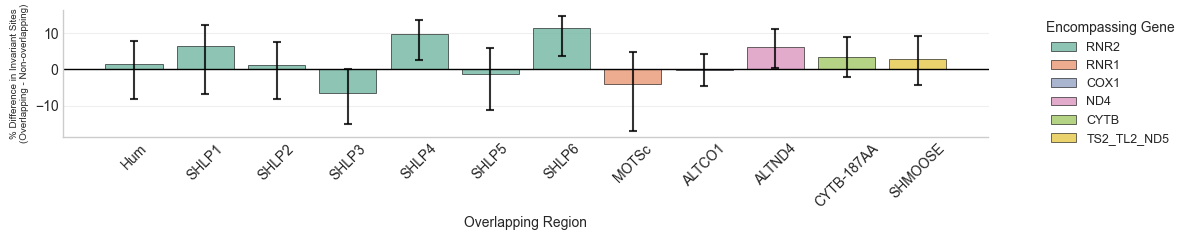

In [10]:
reload(rcd)
stats_list_splitview = [rnr2_cons_profile['conservation_splitview_stats'],
                       rnr1_cons_profile['conservation_splitview_stats'],
                       cox1_cons_profile['conservation_splitview_stats'],
                       nd4_cons_profile['conservation_splitview_stats'],
                       cyb_cons_profile['conservation_splitview_stats'],
                       shmoose_cons_profile['conservation_splitview_stats']
                       ]
gene_names = ['RNR2', 'RNR1', 'COX1', 'ND4', 'CYTB', 'TS2_TL2_ND5']

fig, summary_df = rcd.plot_mdp_invariant_sites_summary(
    stats_list=stats_list_splitview,
    gene_names=gene_names,
    output_path =os.path.join(PATH, 'figures', 'mdp_invariant_sites_summary.'),
    show_title = False,
    figsize = (12, 2.5)
)
display(summary_df)